# Time2Feat (Only Feature extraction) -> Umap -> HDBSCAN over Umap results 

In [2]:
from cookie_clusters import *

In [14]:
import os
import sys
import pickle
from sklearn.cluster import HDBSCAN
import umap

In [4]:
sys.path
sys.path.append("/home/julian/FilRouge_territoires")
sys.path

['/home/julian/FilRouge_territoires/notebooks',
 '/home/julian/miniconda3/envs/FilRouge/lib/python39.zip',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/lib-dynload',
 '',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages',
 '/home/julian/FilRouge_territoires']

In [5]:
file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
dic_de_pixels = pickle.load(file)
file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

data_cube = np.loadtxt('../data/processed/(54, 141, 6).csv', delimiter=",")
data_cube = data_cube.reshape(54, 141, 6)

In [6]:
from t2f.extraction.extractor import feature_extraction
from t2f.utils.importance_old import feature_selection
from t2f.model.clustering import ClusterWrapper

# Feature extraction T2F
df_feats_i = feature_extraction(data_cube, batch_size=100, p=1)
display(df_feats_i.shape)

Feature Extraction: 100%|██████████| 324/324 [00:18<00:00, 17.88it/s]


(54, 4818)

In [7]:
reducer = umap.UMAP(random_state=42)

In [8]:
support_matrice = pd.DataFrame(df_feats_i)

classes = list()

for i in pixels_de_interet:
    for j, k in zip(list(dic_de_pixels.keys()), range(0, len(list(dic_de_pixels.keys())))):
        if i in list(dic_de_pixels[j]):
            classes.append(k)

In [9]:
df_feats_i.describe()
# Delete columns with any NaN value from 2D NumPy Array
index = np.isnan(df_feats_i).any(axis=0)
df_feats_new = np.delete(df_feats_i, index,axis=1)

In [10]:
display(df_feats_new.shape)
embedding = reducer.fit_transform(df_feats_new)
display(embedding.shape)

(54, 4096)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(54, 2)

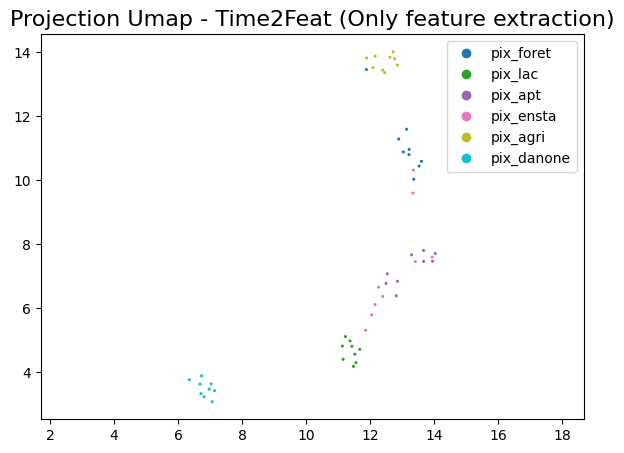

In [12]:
fig = plt.figure(figsize=(7, 5))
scat = plt.scatter(embedding[:, 0],
                   embedding[:, 1],
                   c=[x for x in classes],
                   cmap = 'tab10',
                   s=1.5)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(handles=scat.legend_elements()[0], labels=[key for key in dic_de_pixels.keys()])
plt.title('Projection Umap - Time2Feat (Only feature extraction)', fontsize=16)
plt.show()

In [13]:
embedding.shape

(54, 2)

In [41]:
hdbcluster = HDBSCAN()
hdbcluster.fit(embedding)
yhat = hdbcluster.labels_
yhat

array([ 2,  2,  2,  2,  2,  2,  2,  2,  1,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  5,  4,  4,  4,  4,  4,  5,  5,  5,  4,  5,  3,  2,  2,  5, -1,
        5,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

In [42]:
eval = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, embedding)

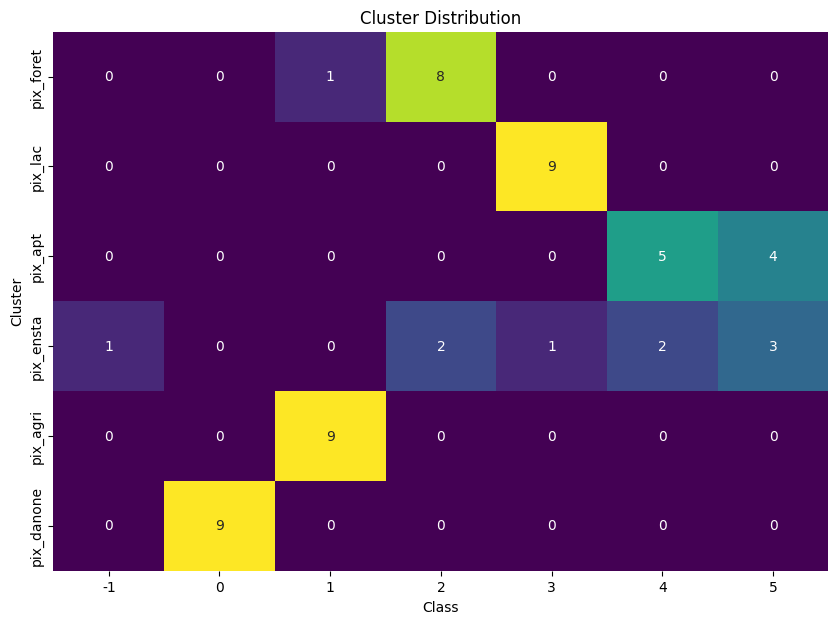

In [43]:
eval.cluster_distribution()